# EDA and NMF on NBA Shooting

## Importing Data


Zip file: https://ucsb.box.com/shared/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip



In [2]:
!wget -nc https://ucsb.box.com/shared/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip -O nba-data.zip
!unzip -o nba-data.zip -d data

--2021-04-01 18:18:51--  https://ucsb.box.com/shared/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip
Resolving ucsb.box.com (ucsb.box.com)... 107.152.24.197
Connecting to ucsb.box.com (ucsb.box.com)|107.152.24.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip [following]
--2021-04-01 18:18:51--  https://ucsb.box.com/public/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip
Reusing existing connection to ucsb.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ucsb.app.box.com/public/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip [following]
--2021-04-01 18:18:51--  https://ucsb.app.box.com/public/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip
Resolving ucsb.app.box.com (ucsb.app.box.com)... 107.152.24.201
Connecting to ucsb.app.box.com (ucsb.app.box.com)|107.152.24.201|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcl

* Team data: `commonTeamYears?LeagueID=00&Season=2018-19`
* Player data: `commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0`
* Player's shot data: `shotchartdetail?PlayerID=[PlayerID]&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&`


### Team Data


In [3]:
from pathlib import Path
import json
import pandas as pd
import numpy as np

fname  = 'data/commonTeamYears?LeagueID=00&Season=2018-19' 
step_1 = Path(fname).read_text()              
step_2 = json.loads(step_1)                   
step_3 = step_2['resultSets'][0]['rowSet']    
step_4 = step_2['resultSets'][0]['headers']


Dropping any teams that no longer exist as of 2019

In [4]:
allteams = allteams = pd.DataFrame(step_3,columns=step_4)
allteams=allteams.dropna()


### Player Data

In [5]:
dirname  = 'data' # directory_name
filename = 'commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0' # file_name
step_1 = Path(dirname).joinpath(filename).read_text()
step_2 = json.loads(step_1)
step_3 = step_2['resultSets'][0]['rowSet']    # list 
step_4 = step_2['resultSets'][0]['headers']   # list

allplayers = pd.DataFrame(step_3,columns=step_4)

allplayers=allplayers.set_index('PERSON_ID')

allplayers=allplayers.sort_index()

### Shots Data

In [6]:
two_files = Path('data').glob('common*') # generator: https://www.educative.io/edpresso/generator-vs-iterator-in-python
list(two_files)                          # list

[PosixPath('data/commonTeamYears?LeagueID=00&Season=2018-19'),
 PosixPath('data/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0')]

Gathing all shot data, then concatenating all dataframes into one dataframe named `allshots`

In [7]:
allshots_files = Path('data').glob('shotchartdetail*')
allshots_files=list(allshots_files)
allshots_files.sort()
allshots_list  = list()

for f in allshots_files:
    
    filename = f # file_name
    step_1 = Path(f).read_text()
    step_2 = json.loads(step_1)
    step_3 = step_2['resultSets'][0]['rowSet']    # list 
    step_4 = step_2['resultSets'][0]['headers']   # list
    shotf = pd.DataFrame(step_3,columns=step_4)
    allshots_list.append(shotf)


In [8]:
allshots = pd.concat(allshots_list)
allshots=allshots.set_index('PLAYER_ID')

allshots=allshots.sort_index()

### Extracting Stephen Curry's Shot Data


In [9]:
allshots.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_NAME', 'TEAM_ID',
       'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING', 'SECONDS_REMAINING',
       'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE', 'SHOT_ZONE_BASIC',
       'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y',
       'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM'],
      dtype='object')

In [11]:
query_str = 'PLAYER_NAME == "Stephen Curry"'
curry_id = str(allshots.query(query_str).index.values[1])
curry_data = allshots.query('PLAYER_ID == ' + curry_id).astype({'SHOT_MADE_FLAG' : bool})

In [12]:
curry_data

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,,,
201939,Shot Chart Detail,0021800862,117,Stephen Curry,1610612744,Golden State Warriors,1,3,55,Made Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,17,2,172,1,True,20190213,POR,GSW
201939,Shot Chart Detail,0021800862,600,Stephen Curry,1610612744,Golden State Warriors,4,5,9,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,116,239,1,False,20190213,POR,GSW
201939,Shot Chart Detail,0021800862,576,Stephen Curry,1610612744,Golden State Warriors,4,6,55,Missed Shot,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,22,225,28,1,False,20190213,POR,GSW
201939,Shot Chart Detail,0021800862,484,Stephen Curry,1610612744,Golden State Warriors,3,2,24,Missed Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,23,-235,8,1,False,20190213,POR,GSW
201939,Shot Chart Detail,0021800862,467,Stephen Curry,1610612744,Golden State Warriors,3,3,3,Missed Shot,Step Back Jump shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,22,193,109,1,False,20190213,POR,GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201939,Shot Chart Detail,0021800494,563,Stephen Curry,1610612744,Golden State Warriors,4,10,50,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,175,195,1,False,20181223,GSW,LAC
201939,Shot Chart Detail,0021800494,510,Stephen Curry,1610612744,Golden State Warriors,3,2,25,Missed Shot,Running Pull-Up Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-163,195,1,False,20181223,GSW,LAC
201939,Shot Chart Detail,0021800494,467,Stephen Curry,1610612744,Golden State Warriors,3,5,33,Missed Shot,Hook Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,-3,75,1,False,20181223,GSW,LAC


## Visualization

### All Shots Scatter Plot
Using `seaborn` to create scatter plot of the location of Stephen Curry's shot attempts from this year (`LOC_X` and `LOC_Y`)

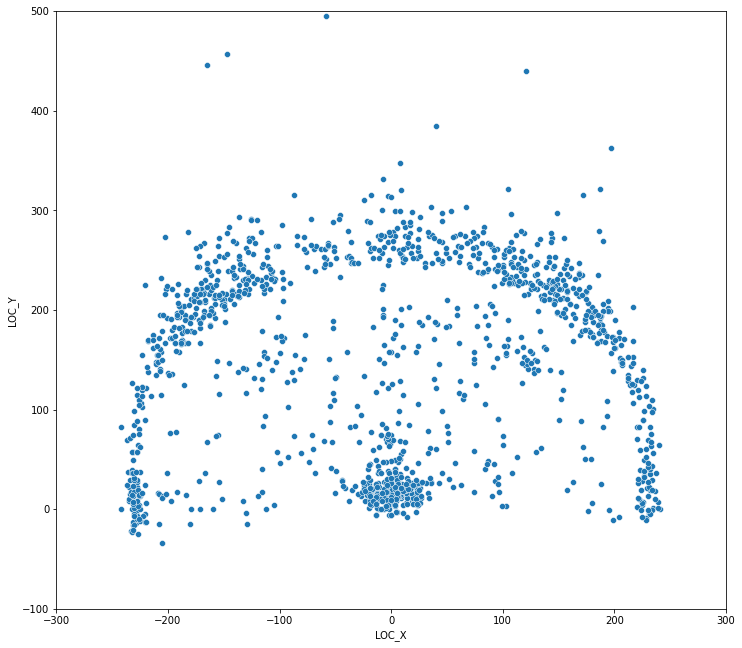

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[12, 11])
ax2a = sns.scatterplot(x=curry_data.LOC_X,y=curry_data.LOC_Y)

plt.ylim(-100, 500)
plt.xlim(-300, 300)
plt.show()

Using code from [http://savvastjortjoglou.com/nba-shot-sharts.html](http://savvastjortjoglou.com/nba-shot-sharts.html) to add the court markings to the diagram.

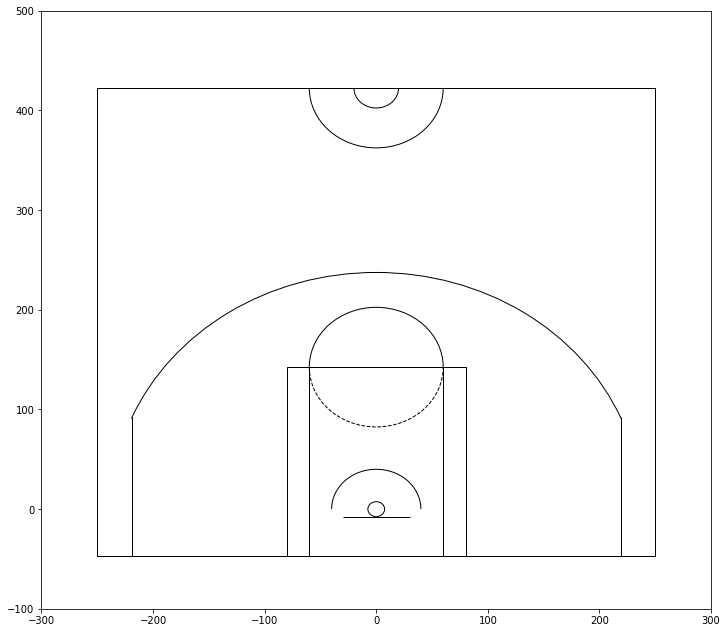

In [14]:
## code is from http://savvastjortjoglou.com/nba-shot-sharts.html
def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    
    from matplotlib.patches import Circle, Rectangle, Arc
    from matplotlib.pyplot import gca
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-219, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((219, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22.5, theta2=157.5, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

All Shots Scatter Plot + Court Outline

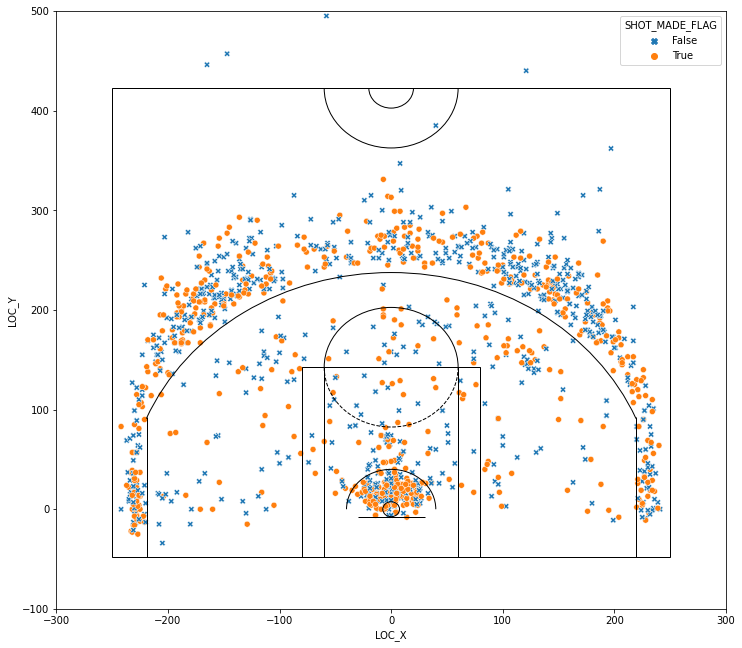

In [15]:
plt.figure(figsize=(12, 11))
markers = {0 : "X", 1 : "o"}
ax2a = sns.scatterplot(data=curry_data,x='LOC_X',y='LOC_Y',hue='SHOT_MADE_FLAG',style='SHOT_MADE_FLAG',markers=markers)


draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)

plt.show()

### Hexbin plot

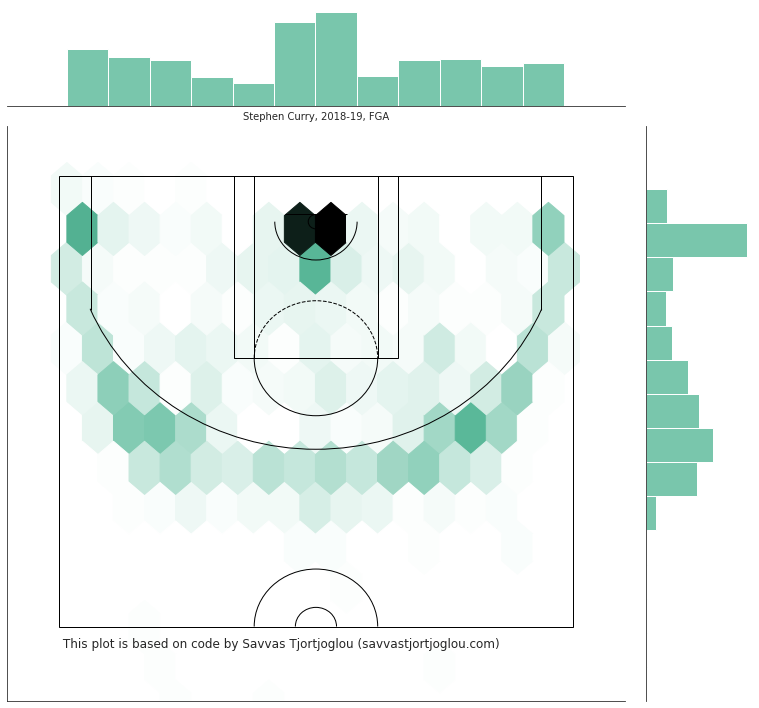

In [16]:
sns.set_style("white")
joint_shot_chart = sns.jointplot(data=curry_data,x='LOC_X',y='LOC_Y', kind="hex", color="#4CB391")
joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax, outer_lines=True)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-300, 300)
ax.set_ylim(500, -100)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax.set_title('Stephen Curry, 2018-19, FGA', 
             y=1.2, fontsize=10)

# Add Data Scource and Author
ax.text(-250,445,'\n This plot is based on code by Savvas Tjortjoglou (savvastjortjoglou.com)',
        fontsize=12);

## Binning and Smoothing Shots



### 2D Smoothing


In [17]:
def bin_shots(df, bin_edges, density=False, sigma=1):
    
    """Given data frame of shots, compute a 2d matrix of binned counts
    Returns:
        binned: counts
        xedges: bin edges in X direction
        yedges: bin edges in Y direction
    """
    import numpy as np
    from scipy import ndimage
    
    ## Call np.histogram2d
    binned,xedges,yedges=np.histogram2d(x=df['LOC_X'].values,y=df['LOC_Y'],bins=bin_edges)
    
    if density:

        # Recompute 'binned' using "gaussian_filter"
        binned = ndimage.filters.gaussian_filter(binned,sigma=sigma)
        
        # Normalize the histogram to be a "density", e.g. mass across all bins sums to 1.
        binned /= np.sum(binned)
    
    return(binned, xedges, yedges)


In [18]:
## bin edge definitions in inches
xedges = np.linspace(start=-300, stop=300, num=151)
yedges = np.linspace(start=-48, stop=372, num=106)

In [19]:
bin_edges = (xedges, yedges)

curry_binned_unsmoothed, xe, ye = bin_shots(curry_data,bin_edges)
curry_binned_smoothed1,  xe, ye = bin_shots(curry_data,bin_edges,density=True)
curry_binned_smoothed5,  xe, ye = bin_shots(curry_data,bin_edges,density=True,sigma=5)


The function below can be used to visualize the shots as a heatmap:

In [20]:
def plot_shotchart(binned_counts, xedges, yedges, ax=None, use_log=False, cmap = 'Reds'):
    
    """Plots 2d heatmap from vectorized heatmap counts
    Returns:
        ax: axes with plot
    """
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    ## number of x and y bins.  
    nx = xedges.size - 1
    ny = yedges.size - 1

    X, Y = np.meshgrid(xedges, yedges)
    
    if use_log:
        counts = np.log(binned_counts + 1)
        
    if ax is None:
        fig, ax = plt.subplots(1,1)
    
    ax.pcolormesh(X, Y, binned_counts.T, cmap=cmap) 
    ax.set_aspect('equal')
    
    draw_court(ax)
    
    return(ax)

Side by side plots of `curry_binned_unsmoothed`, `curry_binned_smoothed1` and `curry_binned_smoothed5`

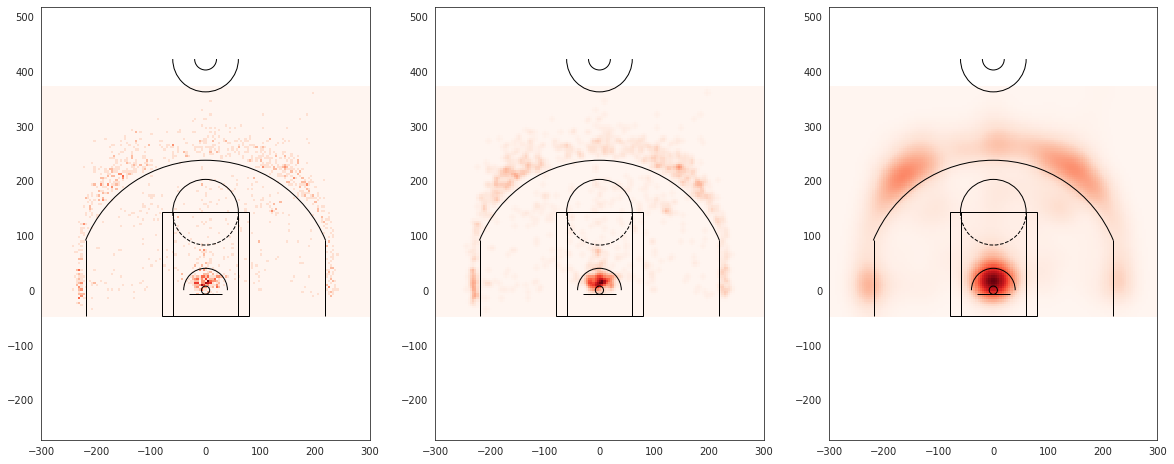

In [21]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,60))
plot_shotchart(curry_binned_unsmoothed,xe,ye,ax=ax1)
plot_shotchart(curry_binned_smoothed1,xe,ye,ax=ax2)
plot_shotchart(curry_binned_smoothed5,xe,ye,ax=ax3)
fig.show()

### Vectorize Shot Images

Creating a dictionary of smoothed patterns, each vectorized into a 1-d array

In [22]:
## number of bins is one less than number of edges
nx = xedges.size - 1
ny = yedges.size - 1

## 2d histogram containers for binned counts and smoothed binned counts
all_counts = []
all_smooth = []
pids = []

## 2d histogram containers for binned counts and smoothed binned counts

## data matrix: players (row) by vectorized 2-d court locations (column)
for i, one in enumerate(allshots.groupby('PLAYER_ID')):
    
    pid, pdf = one
        
    num_shots = len(pdf.index)
    if(num_shots > 100): 
        
        tmp1, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=True, sigma=2)
        tmp2, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=False)
    
        ## vectorize and store into list
        all_smooth += [tmp1.reshape(-1)]
        all_counts += [tmp2.reshape(-1)]
        pids += [pid]
        
X = np.vstack(all_smooth).T
p, n = X.shape

print('Number of shot regions (p):', p)
print('Number of players (n):', n)

Number of shot regions (p): 15750
Number of players (n): 388


## Non-negative Matrix Factorization (NMF) 

#### The data matrix $X$ 
$X$ is of dimension $n$={number of players} and $p$={number of total square bins on the court}. Each column corresponds to a player, with entries corresponding to a "flattened" or "vectorized" version of the 2d histograms.

#### Bases matrix: $W$

Columns $W_i$ contain the shot "bases".

#### Coefficient matrix: H

Each column of $H$ gives a coefficient for each of the bases vectors in $W$, and there are $n$ columns for each player.


In [24]:
## Non-negative Matrix Factorization
def non_negative_matrix_decomp(n_components, array_data):
    import sklearn.decomposition as skld
    model = skld.NMF(n_components=n_components, init='nndsvda', max_iter=500, random_state=0)
    W = model.fit_transform(array_data)
    
    # Normalize basis vectors to sum to 1
    Wsum = W.sum(axis=0)
    W = W/Wsum
    
    ## fix H correspondingly
    H = model.components_
    H = (H.T * Wsum).T

    nmf = (W, H)
    return(nmf)

### Computing NMF Factorization

Computing the NMF on all player's shot charts, X, setting `n_components` = 3

In [25]:
W3, H3 = non_negative_matrix_decomp(3, X)

### Visualizing Shot Types

Plotting the first three basis vectors.


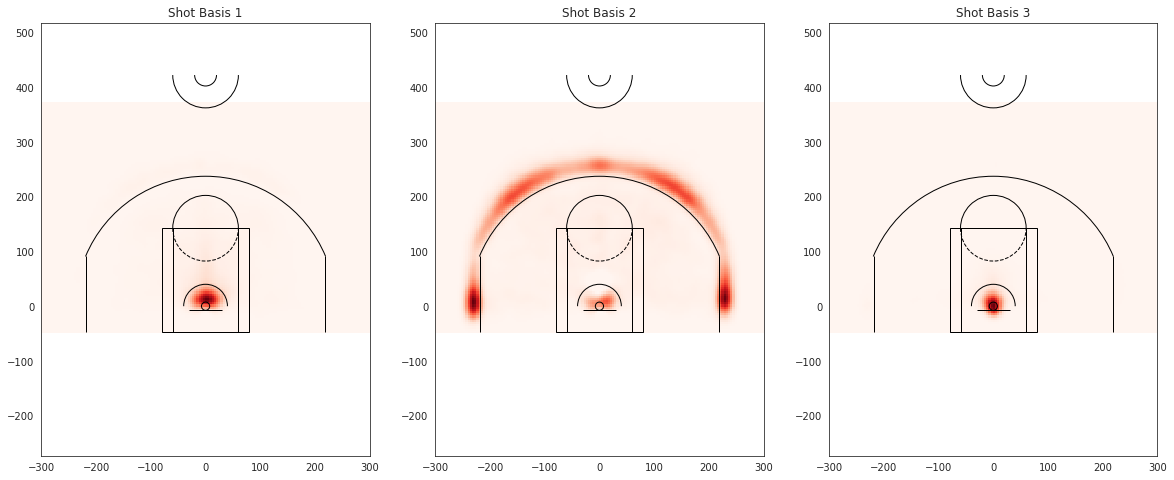

In [26]:
def plot_vectorized_shotchart(vec_counts, xedges, yedges, ax=None, use_log=False, cmap = 'Reds'):
    
    """Plots 2d heatmap from vectorized heatmap counts
    Returns:
        ax: axes with plot
    """

    nx = xedges.size-1
    ny = yedges.size-1
    
    # using reshape to convert a vectorized counts back into a 2d histogram
    two_d_counts = np.reshape(vec_counts,(nx,ny))
    
    return(plot_shotchart(two_d_counts, xedges, yedges, ax=ax, use_log=use_log, cmap=cmap))

fig, ax = plt.subplots(1, 3, figsize=(20,60))

for i in range(3):
    plot_vectorized_shotchart(W3[:,i],xedges,yedges,ax[i])
    
    ax[i].set_title('Shot Basis %i' % (i+1))


### Reconstruction Error

Re-constructing the shooting pattern for a single player. Here we use the approximation $$\hat{X} = WH$$ obtained via NMF.

In [27]:
X_hat = W3@H3

<!-- END QUESTION -->



Plot $X$, $\hat X$ and the residual ($X - \hat X$) for the player named LaMarcus Aldridge. Remember, each column of $X$ is a vectorized matrix corresponding to the binned (or smoothed binned) shot information.

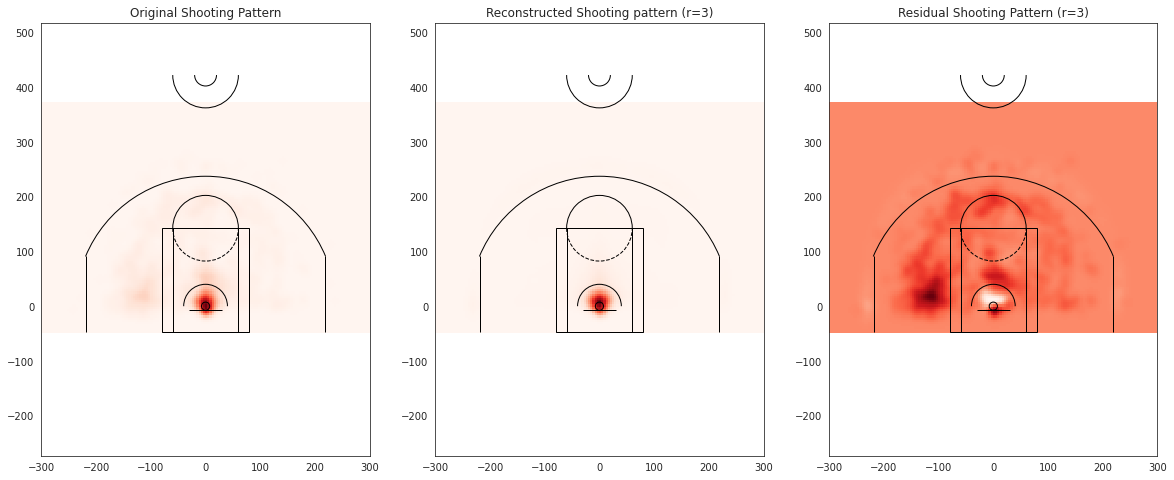

In [28]:
# player_id of LaMarcus Aldridge
query_str = 'PLAYER_NAME == "LaMarcus Aldridge"'
player_id = allshots.query(query_str).index.values[1]


## index in X corresponding to that player
to_plot_idx = np.where(pids == player_id)[0][0]

fig, ax = plt.subplots(1, 3, figsize=(20,60))

## Calling plot_vectorized_shot_chart
original_shotchart = plot_vectorized_shotchart(X[:,to_plot_idx],xedges,yedges,ax=ax[0])
reconstructed_shotchart = plot_vectorized_shotchart(X_hat[:,to_plot_idx],xedges,yedges,ax=ax[1])
X_resid = X[:,to_plot_idx]-X_hat[:,to_plot_idx]
residual_chart = plot_vectorized_shotchart(X_resid,xedges,yedges,ax=ax[2])

#print(max(abs(X3_hat[:, to_plot_idx] - X[:, to_plot_idx])))
ax[0].set_title('Original Shooting Pattern')
ax[1].set_title('Reconstructed Shooting pattern (r=3)')
ax[2].set_title('Residual Shooting Pattern (r=3)')
fig.show()


### More Detailed Modeling

10 basis vectors instead of 3.

In [ ]:
W10, H10 = non_negative_matrix_decomp(10, X)

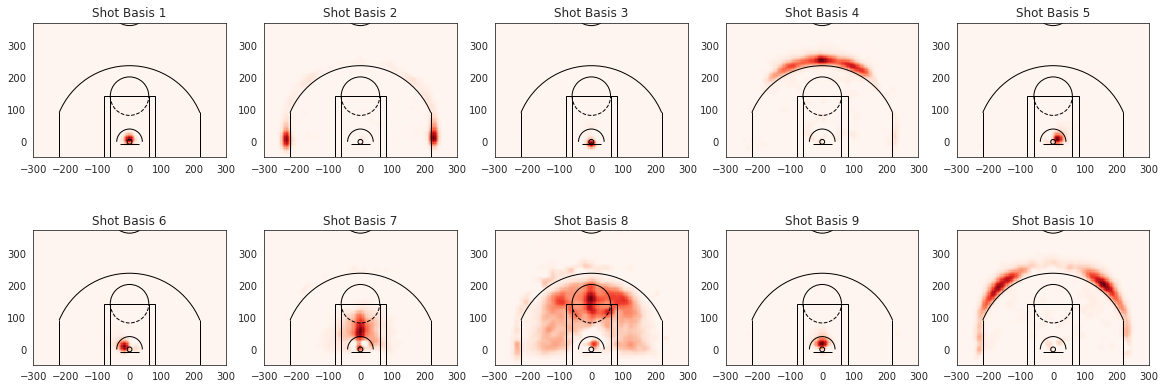

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(20, 7))

## Write a for loop
for i in range(10):
    ax = ax.flatten()
    plot_vectorized_shotchart(W10[:,i],xedges,yedges,ax[i])
    ax[i].set_title('Shot Basis %i' % (i+1))

Here we can identify different shooting styles among players. This is evidence of asymmetry. Certain players are left hand or right hand dominant so they may shoot better from one side of the basket. This is evident in Shot Basis 6 compared to Shot Basis 5. Also, as being right handed is more common, players often shoot from the right of the court, as exemplified by Shot Basis 8 and Shot Basis 10.

In [ ]:
X10_hat = W10@H10

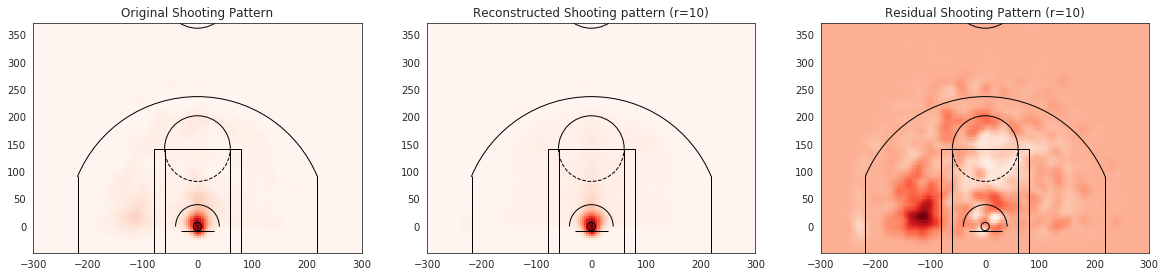

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,60))


original_shotchart = plot_vectorized_shotchart(X[:,to_plot_idx],xedges,yedges,ax=ax[0])
reconstructed_shotchart = plot_vectorized_shotchart(X10_hat[:,to_plot_idx],xedges,yedges,ax=ax[1])
X_resid = X[:,to_plot_idx]-X10_hat[:,to_plot_idx]
residual_chart = plot_vectorized_shotchart(X_resid,xedges,yedges,ax=ax[2])

ax[0].set_title('Original Shooting Pattern')
ax[1].set_title('Reconstructed Shooting pattern (r=10)')
ax[2].set_title('Residual Shooting Pattern (r=10)');

### Comparing Players 

Using the `H10` matrix to compare players

In [ ]:
indone=0
indtwo=0
min = 1e99
for i in range(388):
    for j in range(388):
        if (i == j):
            continue
        diff=H10[:,i]-H10[:,j]
        dist=np.linalg.norm(diff)
        if (dist<min):
            indone=i
            indtwo=j
            min=dist

In [ ]:
x1=allshots.query('PLAYER_ID == ' + str(pids[indone])).PLAYER_NAME.iloc[0]
x2=allshots.query('PLAYER_ID == ' + str(pids[indtwo])).PLAYER_NAME.iloc[0]
print("The smallest seperation is:",x1,"and",x2)

The smallest seperation is: CJ McCollum and Jamal Murray


In [ ]:
min = 1e99
one1=indone
two1=indtwo
for i in range(388):
    for j in range(388):
        if (i == j):
            continue
        if ((i == one1 and j == two1) or (j == one1 and i == two1)) :
            continue
        diff=H10[:,i]-H10[:,j]
        dist=np.linalg.norm(diff)
        if (dist<min):
            indone=i
            indtwo=j
            min=dist

In [ ]:
x1=allshots.query('PLAYER_ID == ' + str(pids[indone])).PLAYER_NAME.iloc[0]
x2=allshots.query('PLAYER_ID == ' + str(pids[indtwo])).PLAYER_NAME.iloc[0]
print("The 2nd smallest seperation is:",x1,"and",x2)

The 2nd smallest seperation is: Malik Beasley and Malik Monk


In [ ]:
indone=0
indtwo=0
max = 0
for i in range(388):
    for j in range(388):
        if (i == j):
            continue
        diff=H10[:,i]-H10[:,j]
        dist=np.linalg.norm(diff)
        if (dist>max):
            indone=i
            indtwo=j
            max=dist

In [ ]:
x1=allshots.query('PLAYER_ID == ' + str(pids[indone])).PLAYER_NAME.iloc[0]
x2=allshots.query('PLAYER_ID == ' + str(pids[indtwo])).PLAYER_NAME.iloc[0]
print("The largest seperation is:",x1,"and",x2)

The largest seperation is: PJ Tucker and Kyle O'Quinn


In [ ]:
one1=indone
two1=indtwo
max = 0
for i in range(388):
    for j in range(388):
        if (i == j):
            continue
        if ((i == one1 and j == two1) or (j == one1 and i == two1)) :
            continue
        diff=H10[:,i]-H10[:,j]
        dist=np.linalg.norm(diff)
        if (dist>max):
            indone=i
            indtwo=j
            max=dist

In [ ]:
x1=allshots.query('PLAYER_ID == ' + str(pids[indone])).PLAYER_NAME.iloc[0]
x2=allshots.query('PLAYER_ID == ' + str(pids[indtwo])).PLAYER_NAME.iloc[0]
print("The 2nd largest seperation is:",x1,"and",x2)

The 2nd largest seperation is: Jose Calderon and PJ Tucker


### Residuals

The residuals between `Xhat` and `X` gives a sense of how well a player is decribed by NMF computed matrices `W` and `H`.

In [ ]:
import sklearn.metrics
import math

rmse=np.empty([388])
for i in range(388):
    e=sklearn.metrics.mean_squared_error(X[:,i],X10_hat[:,i])
    np.append(rmse,math.sqrt(e))

In [ ]:
max=np.nanargmax(rmse)
max=allshots.query('PLAYER_ID == ' + str(pids[max])).PLAYER_NAME.iloc[0]
min=np.nanargmin(rmse)
min=allshots.query('PLAYER_ID == ' + str(pids[min])).PLAYER_NAME.iloc[0]
print("The player with the largest seperation is:",max,"and the smallest is",min)

The player with the largest seperation is: Dante Exum and the smallest is Jamal Crawford



### Player Comparison

In [29]:
query_str = 'PLAYER_NAME == "Kevin Durant"'
kd_id = str(allshots.query(query_str).index.values[1])
kd_data = allshots.query('PLAYER_ID == ' + kd_id).astype({'SHOT_MADE_FLAG' : bool})

In [30]:
query_str = 'PLAYER_NAME == "Kyrie Irving"'
ki_id = str(allshots.query(query_str).index.values[1])
ki_data = allshots.query('PLAYER_ID == ' + ki_id).astype({'SHOT_MADE_FLAG' : bool})

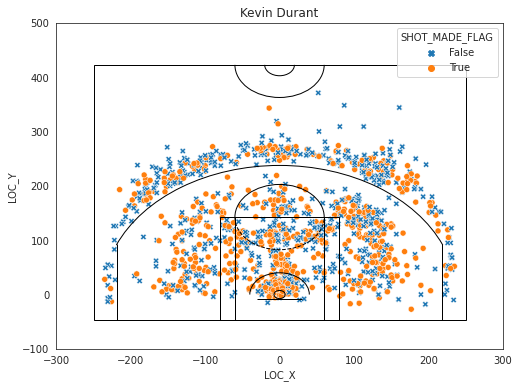

In [31]:
plt.figure(figsize=(8, 6))
markers = {0 : "X", 1 : "o"}
ax2a = sns.scatterplot(data=kd_data,x='LOC_X',y='LOC_Y',hue='SHOT_MADE_FLAG',style='SHOT_MADE_FLAG',markers=markers)
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.title('Kevin Durant')
plt.show()

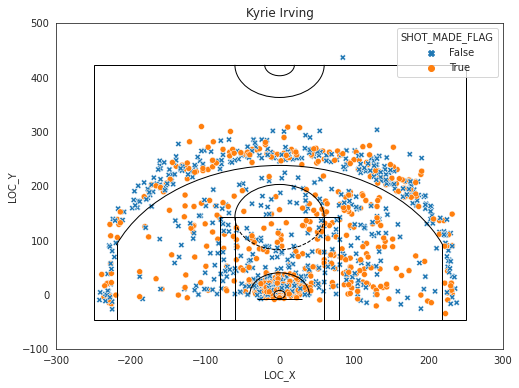

In [32]:
plt.figure(figsize=(8, 6))
markers = {0 : "X", 1 : "o"}
ax2a = sns.scatterplot(data=ki_data,x='LOC_X',y='LOC_Y',hue='SHOT_MADE_FLAG',style='SHOT_MADE_FLAG',markers=markers)
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.title("Kyrie Irving")
plt.show()

It appears that Kyrie Irving shoots from farther out than Kevin Durant. Durant has significantly more success in the paint, mostly due to his height. On the other hand, Kyrie seems to have more success from the 3 point line.

In [ ]:
bin_edges = (xedges, yedges)

kd_binned_unsmoothed, xe, ye = bin_shots(kd_data,bin_edges)
kd_binned_smoothed1,  xe, ye = bin_shots(kd_data,bin_edges,density=True)
kd_binned_smoothed5,  xe, ye = bin_shots(kd_data,bin_edges,density=True,sigma=5)

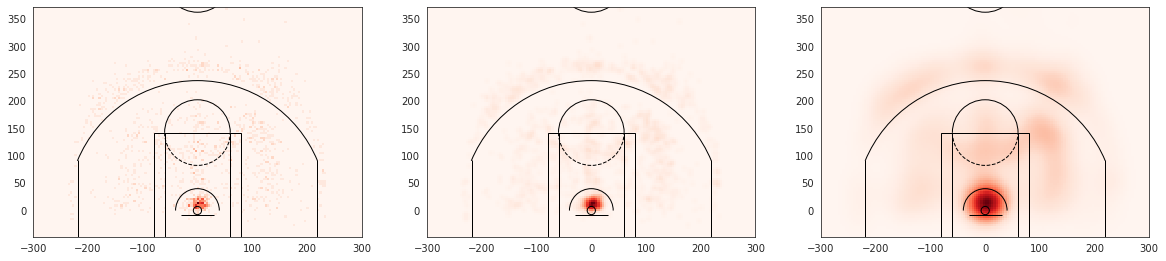

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,60))
plot_shotchart(kd_binned_unsmoothed,xe,ye,ax=ax1)
plot_shotchart(kd_binned_smoothed1,xe,ye,ax=ax2)
plot_shotchart(kd_binned_smoothed5,xe,ye,ax=ax3)
fig.show()

In [ ]:
bin_edges = (xedges, yedges)

ki_binned_unsmoothed, xe, ye = bin_shots(ki_data,bin_edges)
ki_binned_smoothed1,  xe, ye = bin_shots(ki_data,bin_edges,density=True)
ki_binned_smoothed5,  xe, ye = bin_shots(ki_data,bin_edges,density=True,sigma=5)

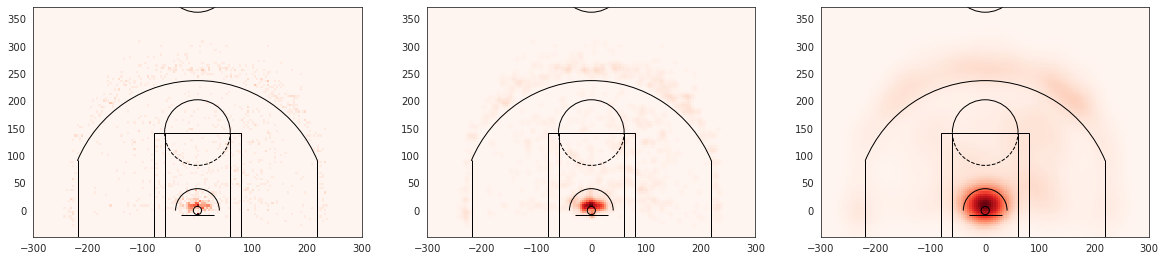

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,60))
plot_shotchart(ki_binned_unsmoothed,xe,ye,ax=ax1)
plot_shotchart(ki_binned_smoothed1,xe,ye,ax=ax2)
plot_shotchart(ki_binned_smoothed5,xe,ye,ax=ax3)
fig.show()

Kyrie takes more shots from the 3 point corner than Kevin Durant does.